# Lecture 4 –Fall 2024

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [26]:
!pip install plotly

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px


## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [162]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Exercises
We want to obtain the first three baby names with `count > 250`.

1.Code this using head()

2.Code this using loc

3.Code this using iloc

4.Code this using []


In [3]:
# Answer Here

baby1=babynames[babynames["Count"]>250]
baby1.head(3)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [4]:
# Answer Here
locc=baby1.loc[baby1.index[0:3],:]
locc

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [5]:
# Answer Here
#baby1.index[0:3]
filter_babynames  = babynames[babynames['Count']>250]
filter_babynames.iloc[[0,1,2],:]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


In [6]:
# Answer Here
babynames[babynames["Count"]>250][:3]

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
233,CA,F,1911,Mary,390
484,CA,F,1912,Mary,534


### `.isin` for Selection based on a list, array, or `Series`

In [7]:
# Note: The parentheses surrounding the code make it possible to break the code into multiple lines for readability
babynames[(babynames["Name"] == "Bella") |
              (babynames["Name"] == "Alex") |
              (babynames["Name"] == "Narges") |
              (babynames["Name"] == "Lisa")]


,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
399773,CA,M,2019,Alex,438
402648,CA,M,2020,Alex,379
405452,CA,M,2021,Alex,334
408335,CA,M,2022,Alex,345


In [8]:
# A more concise method to achieve the above: .isin
#Answer Here

babynames[babynames["Name"].isin(["Bella","Alex","Narges","Lisa"])]

,State,Sex,Year,Name,Count
6289,CA,F,1923,Bella,5
7512,CA,F,1925,Bella,8
12368,CA,F,1932,Lisa,5
14741,CA,F,1936,Lisa,8
17084,CA,F,1939,Lisa,5
...,...,...,...,...,...
399773,CA,M,2019,Alex,438
402648,CA,M,2020,Alex,379
405452,CA,M,2021,Alex,334
408335,CA,M,2022,Alex,345


### `.str` Functions for Defining a Condition

In [9]:
# What if we only want names that start with "J"?
#Answer Here
babynames[babynames["Name"].str.startswith("J")]


,State,Sex,Year,Name,Count
16,CA,F,1910,Josephine,66
44,CA,F,1910,Jean,35
46,CA,F,1910,Jessie,32
59,CA,F,1910,Julia,28
66,CA,F,1910,Juanita,25
...,...,...,...,...,...
413714,CA,M,2023,Jj,5
413715,CA,M,2023,Johnathon,5
413716,CA,M,2023,Jorden,5
413717,CA,M,2023,Jozef,5


# Custom Sort

In [10]:
# Sort a Series Containing Names
babynames["Name"].sort_values()

387660      Aadan
369654      Aadan
372774      Aadan
401876    Aadarsh
388799      Aaden
           ...   
232190      Zyrah
220708      Zyrah
217445      Zyrah
197542      Zyrah
408216      Zyrus
Name: Name, Length: 413894, dtype: object

In [13]:
babynames[babynames["Name"].str.contains("M")]


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
3,CA,F,1910,Margaret,163
11,CA,F,1910,Marie,90
12,CA,F,1910,Mildred,90
22,CA,F,1910,Marjorie,60
...,...,...,...,...,...
413783,CA,M,2023,Momin,5
413784,CA,M,2023,Murray,5
413785,CA,M,2023,Murtaza,5
413786,CA,M,2023,Mycah,5


In [ ]:
# Sort a DataFrame – there are lots of Michaels in California


,State,Sex,Year,Name,Count
271693,CA,M,1957,Michael,8263
270669,CA,M,1956,Michael,8257
321036,CA,M,1990,Michael,8247
285500,CA,M,1969,Michael,8244
286795,CA,M,1970,Michael,8197
...,...,...,...,...,...
294982,CA,M,1975,Michaelangelo,5
294981,CA,M,1975,Micha,5
294980,CA,M,1975,Markus,5
294979,CA,M,1975,Marcoantonio,5


### Approach 1: Create a temporary column

In [11]:
# Create a Series of the length of each name
ser = babynames["Name"].str.len()

# Add the Series as a new column to the DataFrame
babynames["Len_name"]=ser

# Sort the DataFrame by the new column
babynames.sort_values(by="Len_name")

,State,Sex,Year,Name,Count,Len_name
83016,CA,F,1979,Ji,5,2
331174,CA,M,1993,Vu,5,2
298821,CA,M,1978,Al,13,2
277555,CA,M,1962,Ty,55,2
404824,CA,M,2020,Jj,6,2
...,...,...,...,...,...,...
337819,CA,M,1996,Franciscojavier,8,15
325562,CA,M,1991,Franciscojavier,6,15
316193,CA,M,1987,Franciscojavier,5,15
317627,CA,M,1988,Franciscojavier,10,15


In [12]:
# drop new column
babynames.drop("Len_name",axis=1,inplace=True)
babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
413889,CA,M,2023,Ziah,5
413890,CA,M,2023,Ziaire,5
413891,CA,M,2023,Zidane,5
413892,CA,M,2023,Zyan,5


### Approach 2: Sorting using the `key` argument

---



In [13]:
# Answer Here
babynames.sort_values(by="Name",key= lambda x:x.str.len())

,State,Sex,Year,Name,Count
83016,CA,F,1979,Ji,5
331174,CA,M,1993,Vu,5
298821,CA,M,1978,Al,13
277555,CA,M,1962,Ty,55
404824,CA,M,2020,Jj,6
...,...,...,...,...,...
337819,CA,M,1996,Franciscojavier,8
325562,CA,M,1991,Franciscojavier,6
316193,CA,M,1987,Franciscojavier,5
317627,CA,M,1988,Franciscojavier,10


In [14]:
def count1(names):
    print(names.str.contains("dr"))
    
count1(babynames["Name"])


0         False
1         False
2         False
3         False
4         False
          ...  
413889    False
413890    False
413891    False
413892    False
413893    False
Name: Name, Length: 413894, dtype: bool


In [15]:
babynames[["Name"]][(babynames["Name"].str.contains("dr")) | (babynames["Name"].str.contains("ea"))]

,Name
12,Mildred
21,Eleanor
40,Beatrice
44,Jean
64,Pearl
...,...
413624,Deanthony
413733,Kendrix
413750,Landry
413761,Lizandro


In [16]:
babynames[babynames["Name"].str.contains("dr") | babynames["Name"].str.contains("ea")]

,State,Sex,Year,Name,Count
12,CA,F,1910,Mildred,90
21,CA,F,1910,Eleanor,60
40,CA,F,1910,Beatrice,37
44,CA,F,1910,Jean,35
64,CA,F,1910,Pearl,26
...,...,...,...,...,...
413624,CA,M,2023,Deanthony,5
413733,CA,M,2023,Kendrix,5
413750,CA,M,2023,Landry,5
413761,CA,M,2023,Lizandro,5


In [17]:
def fun1(string):
    return string.count("dr") + string.count("ea")

In [18]:
babynames["Count_dr_ea"]=babynames["Name"].map(fun1)
babynames[babynames["Count_dr_ea"]==3]

,State,Sex,Year,Name,Count,Count_dr_ea
101982,CA,F,1986,Deandrea,6,3
108738,CA,F,1988,Deandrea,5,3
115965,CA,F,1990,Deandrea,5,3
131037,CA,F,1994,Leandrea,5,3
311780,CA,M,1985,Deandrea,6,3


### Approach 3: Sorting Using the `map` Function

We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [19]:

# Define a function to count occurrences of 'dr' and 'ea'
def fun1(string):
    return string.count("dr") + string.count("ea")

# Apply the function to each name in the "Name" column and add as a new column
babynames["Count_dr_ea"]=babynames["Name"].map(fun1)


# Sort the DataFrame by the new column in descending order


# Display the top rows


In [ ]:
# Drop the `dr_ea_count` column


## Grouping

Group rows that share a common feature, then aggregate data across the group.

In this example, we count the total number of babies born in each year (considering only a small subset of the data, for simplicity).

<img src="images/groupby.png" width="800"/>

In [56]:
# DataFrame with baby gril names only
f_babynames = babynames[babynames["Sex"] == 'F']

# Answer Here

#Groupby similar features like year and apply aggregate
babynames_f_count = f_babynames.groupby('Year')[["Count"]].agg('sum')
babynames_f_count
# Answer Here

# Sort by Count
#babynames_f_count.sort_values(by = 'Count')

# Sort by Count in descending order
babynames_f_count.sort_values(by = 'Count' , ascending = False,inplace=True)


# Answer Here
# Display the top rows
#babynames_f_count

In [67]:
n_i=np.array(babynames_f_count.index)
n_i

array([1990, 1991, 1992, 1993, 1989, 1994, 2007, 2006, 1995, 2005, 1996,
       2008, 2004, 1988, 2003, 2000, 1997, 2002, 2001, 1998, 1999, 2009,
       1987, 2010, 2014, 2012, 1986, 2011, 2015, 2013, 2016, 1985, 2017,
       1984, 2018, 1983, 1982, 2019, 1981, 1961, 2021, 1963, 2020, 1980,
       1962, 2022, 1960, 1964, 1959, 1970, 1957, 2023, 1979, 1958, 1965,
       1969, 1956, 1968, 1966, 1978, 1967, 1977, 1971, 1955, 1976, 1954,
       1953, 1975, 1972, 1974, 1952, 1973, 1951, 1950, 1949, 1947, 1948,
       1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1924,
       1930, 1925, 1936, 1927, 1928, 1926, 1929, 1931, 1935, 1932, 1934,
       1923, 1933, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914,
       1913, 1912, 1911, 1910], dtype=int64)

In [68]:
num_array=np.array(babynames_f_count["Count"])
num_array

array([262422, 261497, 256788, 249572, 243985, 242484, 236219, 234748,
       234581, 230396, 229765, 229286, 228812, 228418, 226646, 223811,
       222838, 222716, 222271, 220997, 219050, 218255, 215096, 210949,
       209570, 209033, 207684, 207594, 205240, 205076, 203609, 202242,
       195631, 192592, 189315, 187709, 185729, 184384, 181283, 175086,
       174190, 174116, 173966, 173700, 173453, 173353, 172639, 171882,
       166334, 164023, 163971, 163845, 163322, 162977, 161666, 159855,
       156425, 153806, 153737, 153324, 152934, 149570, 148400, 146163,
       143871, 143480, 138851, 138455, 137069, 136617, 131352, 130788,
       120923, 113538, 113220, 112887, 111420,  99288,  83507,  79836,
        77976,  69019,  55744,  49922,  45615,  44521,  40590,  37890,
        37245,  36913,  36816,  36783,  36751,  36129,  35731,  35102,
        34919,  34230,  34208,  34123,  32895,  30917,  30478,  28136,
        23288,  23052,  20864,  19555,  18643,  13815,  11860,   9804,
      

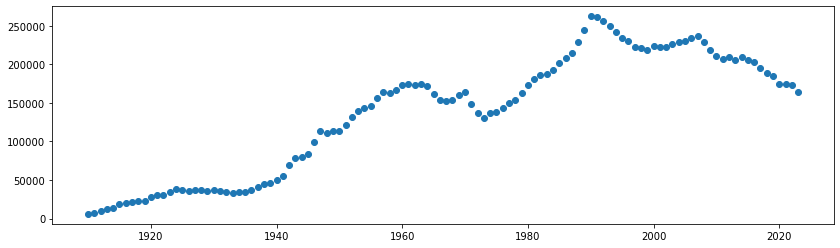

In [72]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(14,4))
plt.scatter(n_i,num_array)

In [28]:
# print first 10 entries
f_babynames.head(10)

,State,Sex,Year,Name,Count,Count_dr_ea
0,CA,F,1910,Mary,295,0
1,CA,F,1910,Helen,239,0
2,CA,F,1910,Dorothy,220,0
3,CA,F,1910,Margaret,163,0
4,CA,F,1910,Frances,134,0
5,CA,F,1910,Ruth,128,0
6,CA,F,1910,Evelyn,126,0
7,CA,F,1910,Alice,118,0
8,CA,F,1910,Virginia,101,0
9,CA,F,1910,Elizabeth,93,0


In [29]:
# the total baby count in each year
# Answer Here
babynames_f_count

,Count
Year,
1990,262422
1991,261497
1992,256788
1993,249572
1989,243985
...,...
1914,13815
1913,11860
1912,9804


There are many different aggregation functions we can use, all of which are useful in different applications.

In [95]:
babynames["Year"].min()

1910

In [126]:
babynames[babynames["Name"]=="Aadya"]

,State,Sex,Year,Name,Count,Count_dr_ea
175397,CA,F,2006,Aadya,7,0
188118,CA,F,2009,Aadya,7,0
192293,CA,F,2010,Aadya,7,0
195611,CA,F,2011,Aadya,11,0
199391,CA,F,2012,Aadya,13,0
203795,CA,F,2013,Aadya,10,0
206887,CA,F,2014,Aadya,23,0
210773,CA,F,2015,Aadya,26,0
214636,CA,F,2016,Aadya,29,0
218634,CA,F,2017,Aadya,24,0


In [97]:
# What is the earliest year in which each name appeared?
# Answer Here
f_babynames.groupby('Name')[['Year',"Count"]].agg("first")

,Year,Count
Name,,
Aadhini,2022,6
Aadhira,2017,6
Aadhya,2007,5
Aadya,2006,7
Aahana,2007,6
...,...,...
Zyanya,1986,6
Zyla,2008,5
Zylah,2008,5


In [107]:
# What is the largest single-year count of each name?
# Answer Here
f_babynames.groupby("Name")[["Year","Count"]].agg(max)


,Year,Count
Name,,
Aadhini,2022,6
Aadhira,2022,10
Aadhya,2023,50
Aadya,2023,29
Aahana,2022,26
...,...,...
Zyanya,2023,15
Zyla,2023,35
Zylah,2023,20


In [113]:
#Can you find the most popular baby name in the state of California (CA) for each year? use idxmax function.
#Provide a list of years along with the corresponding most popular names."
result = babynames.groupby("Year")['Count'].idxmax()
#Answer Here
'''for i,j in result.items():
    print(i,babynames.loc[j,'Name'])'''
result.items

<bound method Series.items of Year
1910         0
1911       233
1912       484
1913    243717
1914      1120
         ...  
2019    399666
2020    402534
2021    405331
2022    408217
2023    411112
Name: Count, Length: 114, dtype: int64>

In [119]:
#Can you find the most popular baby name in the state of California (CA) for each year? use idxmax function.
#Provide a list of years along with the corresponding most popular names."
result = babynames.groupby("Year")['Count'].idxmax()
#Answer Here
'''for i,j in result.items():
    print(i,babynames.loc[j,'Name'])'''
result

Year
1910         0
1911       233
1912       484
1913    243717
1914      1120
         ...  
2019    399666
2020    402534
2021    405331
2022    408217
2023    411112
Name: Count, Length: 114, dtype: int64

## Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [127]:
#Answer Here

f_babynames

,State,Sex,Year,Name,Count,Count_dr_ea
0,CA,F,1910,Mary,295,0
1,CA,F,1910,Helen,239,0
2,CA,F,1910,Dorothy,220,0
3,CA,F,1910,Margaret,163,0
4,CA,F,1910,Frances,134,0
...,...,...,...,...,...,...
243185,CA,F,2023,Zeppelin,5,0
243186,CA,F,2023,Zhamira,5,0
243187,CA,F,2023,Zina,5,0
243188,CA,F,2023,Zooey,5,0


In [128]:
# We sort the data by year
f_babynames=babynames.sort_values("Year")
f_babynames

,State,Sex,Year,Name,Count,Count_dr_ea
0,CA,F,1910,Mary,295,0
243306,CA,M,1910,Floyd,5,0
243307,CA,M,1910,Franklin,5,0
243308,CA,M,1910,Guadalupe,5,0
243309,CA,M,1910,Leland,5,0
...,...,...,...,...,...,...
240783,CA,F,2023,Zayna,22,0
240784,CA,F,2023,Aashvi,21,0
240785,CA,F,2023,Aida,21,0
240759,CA,F,2023,Eimy,22,0


In [171]:
# We sort the data by year
f_babynames.sort_values(by = 'Count', ascending = False, inplace=True)
f_babynames.head(4)

<ipython-input-171-f695e3a98ab1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Sex,Year,Name,Count
116387,CA,F,1991,Jessica,6951
102698,CA,F,1987,Jessica,6847
23823,CA,F,1947,Linda,6759
112642,CA,F,1990,Jessica,6633


To build our intuition on how to answer our research question, let's visualize the prevalence of the name "Jennifer" over time.

In [177]:
f_babynames = babynames[babynames['Sex']=='F']
f_babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
243185,CA,F,2023,Zeppelin,5
243186,CA,F,2023,Zhamira,5
243187,CA,F,2023,Zina,5
243188,CA,F,2023,Zooey,5


In [172]:
# We'll talk about how to generate plots in a later lecture
jennifer_name = f_babynames[f_babynames["Name"] == "Jennifer"]
jennifer_name.sort_values(by = 'Year', inplace= True)
fig = px.scatter(jennifer_name,
              x = "Year", y = "Count")
fig.update_layout(font_size = 18,
                  autosize=False,
                 width=1000,
                  height=400)
fig.show()

<ipython-input-172-0a4e812f48f5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We'll need a mathematical definition for the change in popularity of a name.

Define the metric "ratio to peak" (RTP). We'll calculate this as the count of the name in 2022 (the most recent year for which we have data) divided by the largest count of this name in *any* year.

A demo calculation for Jennifer:

In [176]:
# Find the highest Jennifer 'count'
high_J = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"].max()
high_J

6065

In [180]:
# Remember that we sorted f_babynames by year.
# This means that grabbing the final entry gives us the most recent count of Jennifers: 114
# In 2022, the most recent year for which we have data, 114 Jennifers were born
J2023 = f_babynames[f_babynames["Name"] == "Jennifer"][["Count"]].iloc[-1]
J2023

Count    88
Name: 239956, dtype: int64

In [181]:
# Compute the RTP
rtp = JIn22 / high_J
print(f"The RTP ratio is : {rtp}")

The RTP ratio is : 0.018961253091508656


We can also write a function that produces the `ratio_to_peak`for a given `Series`. This will allow us to use `.groupby` to speed up our computation for all names in the dataset.

In [140]:
# define the function for RTP
 # Assuming most recent year is at the end
def ratio_to_peak(series):
    return  series.iloc[-1] / series.max()



"""
Compute the RTP for a Series containing the counts per year for a single name
"""

'\nCompute the RTP for a Series containing the counts per year for a single name\n'

In [141]:
# Construct a Series containing our Jennifer count data
jenn_count = f_babynames[f_babynames["Name"] == "Jennifer"]["Count"]



# Then, find the RTP using the function define above
ratio_to_peak(jenn_count)

0.0008244023083264633

Now, let's use `.groupby` to compute the RTPs for *all* names in the dataset.

You may see a warning message when running the cell below. As discussed in lecture, `pandas` can't apply an aggregation function to non-numeric data (it doens't make sense to divide "CA" by a number). By default, `.groupby` will drop any columns that cannot be aggregated.

In [155]:
# Results in a TypeError
#rtp_table = f_babynames.groupby("Name").agg(ratio_to_peak)
#rtp_table

In [156]:
# Find the RTP fro all names at once using groupby as describe in lec slides
rtp_table = f_babynames.groupby("Name")[["Year","Count"]].agg(ratio_to_peak)
rtp_table

,Year,Count
Name,,
Aadan,1.000000,0.714286
Aadarsh,1.000000,1.000000
Aaden,0.999505,0.063291
Aadhav,0.997524,0.750000
Aadhini,1.000000,1.000000
...,...,...
Zymir,1.000000,1.000000
Zyon,0.992585,0.238095
Zyra,0.995551,0.178571


To avoid the warning message above, we explicitly extract only the columns relevant to our analysis before using `.agg`.

In [158]:
# Recompute the RTPs, but only performing the calculation on the "Count" column
rtp_table = f_babynames.groupby("Name")['Count'].agg(ratio_to_peak)
rtp_table.sort_values()

Name
Michael    0.000605
David      0.000616
John       0.000683
Robert     0.000705
Jessica    0.000719
             ...   
Haille     1.000000
Hailley    1.000000
Haillie    1.000000
Hadriel    1.000000
Zyrus      1.000000
Name: Count, Length: 20629, dtype: float64

In [148]:
# Rename "Count" to "Count RTP" for clarity
rtp_table.rename('Count RTP',inplace= True)
rtp_table

Name
Aadan      0.714286
Aadarsh    1.000000
Aaden      0.063291
Aadhav     0.750000
Aadhini    1.000000
             ...   
Zymir      1.000000
Zyon       0.238095
Zyra       0.178571
Zyrah      0.833333
Zyrus      1.000000
Name: Count RTP, Length: 20629, dtype: float64

In [149]:
# What name has fallen the most in popularity?
names = rtp_table.sort_values().head(1).index[0]
names

'Michael'

We can visualize the decrease in the popularity of the name "?:"

In [170]:
def plot_name(*names):
    fig = px.scatter(f_babynames[f_babynames["Name"].isin(names)],
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names[0:]}")
    fig.update_layout(font_size = 18,
                  autosize=False,
                  width=1000,
                  height=400)
    return fig
# pass the name into plot_name
plot_name(names)

In [151]:
# Find the 10 names that have decreased the most in popularity
# Answer Here
top10 = rtp_table.sort_values().head(10).index[0:10]
top10

Index(['Michael', 'David', 'John', 'Robert', 'Jessica', 'Linda', 'Christopher',
       'Jennifer', 'Daniel', 'Mark'],
      dtype='object', name='Name')

In [152]:
plot_name(*top10)

For fun, try plotting your name or your friends' names.